# Part I - Linear Clasifier

In [67]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)


K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1)+b1
    loss = 1./batch_size*np.square(y_pred-y).sum()+reg*np.sum(w1*w1)
    loss_history.append(loss)

    # Backward pass
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    dw1 = x.T.dot(dy_pred)+reg*w1
    db1 = dy_pred.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

    # Printing accuracies and displaying w as images
    if t%10==0:
        print('iteration %d / %d : loss %f'%(t,iterations,loss))






x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
iteration 0 / 300 : loss 1.000007
iteration 10 / 300 : loss 0.876637
iteration 20 / 300 : loss 0.842540
iteration 30 / 300 : loss 0.823616
iteration 40 / 300 : loss 0.812389
iteration 50 / 300 : loss 0.805426
iteration 60 / 300 : loss 0.800906
iteration 70 / 300 : loss 0.797822
iteration 80 / 300 : loss 0.795605
iteration 90 / 300 : loss 0.793930
iteration 100 / 300 : loss 0.792605
iteration 110 / 300 : loss 0.791515
iteration 120 / 300 : loss 0.790590
iteration 130 / 300 : loss 0.789785
iteration 140 / 300 : loss 0.789073
iteration 150 / 300 : loss 0.788432
iteration 160 / 300 : loss 0.787851
iteration 170 / 300 : loss 0.787319
iteration 180 / 300 : loss 0.786829
iteration 190 / 300 : loss 0.786374
iteration 200 / 300 : loss 0.785952
iteration 210 / 300 : loss 0.785557
iteration 220 / 300 : loss 0.785187
iteration 230 / 300 : loss 0.784840
iteration 240 / 300 : loss 0.784512
iteration 250 / 300 : loss 0.784203
iteration 260 / 300 :

In [ ]:
# 

# Displaying the weights matrix

In [50]:
w1=w1*255*100
print(w1.min(),w1.max())
np.interp(w1, (w1.min(), w1.max()), (0, 255))
print(w1.min(),w1.max())

-258.08522677149546 248.64075780454064
-258.08522677149546 248.64075780454064


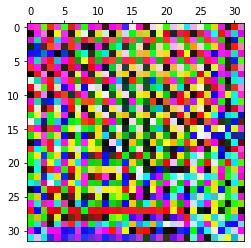

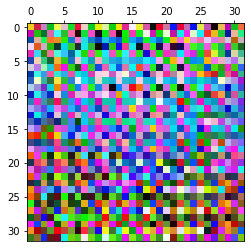

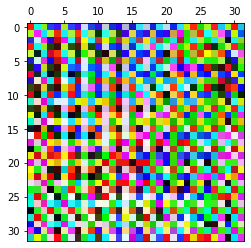

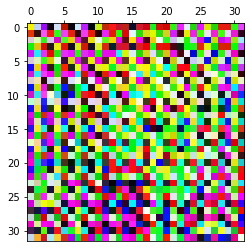

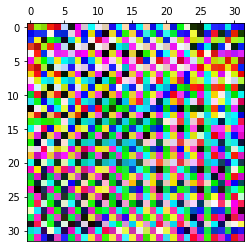

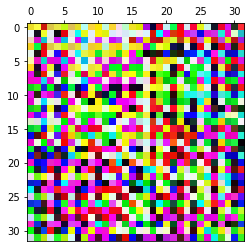

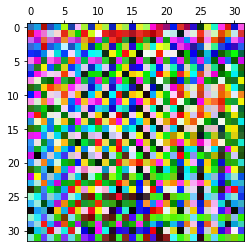

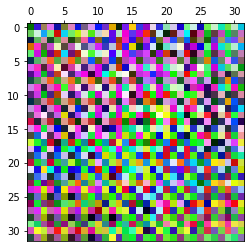

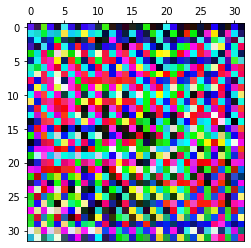

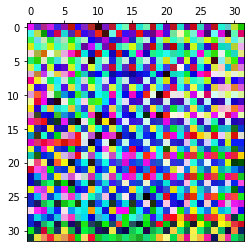

In [65]:
%matplotlib inline
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
im= np.zeros((32,32,3),dtype = np.uint8)

for k in range(10):
    for i in range(32):
        for j in range(32):
            im[i,j] = [w1.T[k][31*i+i+j],w1.T[k][31*i+i+j+1024],w1.T[k][31*i+i+j+2048]]
    

    fig,ax = plt.subplots()
    ax.imshow(im,cmap = 'gray',vmin=w1.min(),vmax=w1.max())
    ax.xaxis.tick_top()
    plt.show()

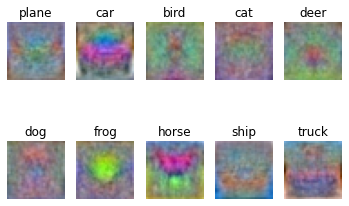

In [71]:
#w = best_svm.W[:-1,:] # strip out the bias
w1 = w1.reshape(32, 32, 3, 10)
w1_min, w1_max = np.min(w1), np.max(w1)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

#plt.figure(figsize=(8, 6))
for i in range(10):
   plt.subplot(2, 5, i + 1)

   # Rescale the weights to be between 0 and 255
   wimg = 255.0 * (w1[:, :, :, i].squeeze() - w1_min) / (w1_max - w1_min)
   plt.imshow(wimg.astype('uint8'))
   plt.axis('off')
   plt.title(classes[i])

# Part II - Two layer FC network Sigmoid function included

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)


K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr

iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1)+b1
    loss = 1./batch_size*np.square(y_pred-y).sum()+reg*np.sum(w1*w1)
    loss_history.append(loss)

    # Backward pass
    dy_pred = 1./batch_size*2.0*(y_pred-y)
    dw1 = x.T.dot(dy_pred)+reg*w1
    db1 = dy_pred.sum(axis=0)
    w1-=lr*dw1
    b1-=lr*db1
    lr*=lr_decay

    # Printing accuracies and displaying w as images
    if t%10==0:
        print('iteration %d / %d : loss %f'%(t,iterations,loss))





